# LISUM09, Week 12 Model selection and building
## Name: Laâroussi Saâdeddine
## Mail : laar.saad.eddine@gmail.com
## Country : Morocco

## Importing libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import date, timedelta
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


from catboost import CatBoostClassifier, Pool

from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score

## Reading data

In [2]:
df_s = pd.read_csv('bank.csv',delimiter=";")

In [3]:
df= pd.read_csv('bank-full.csv',delimiter=";")

## Information on data and values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
for column in df.columns:
    #if (df[column].dtype) == 'object':  
        print(column + ': \n')
        print(np.sort(df[column].unique()))
        print(' \n')

age: 

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89
 90 92 93 94 95]
 

job: 

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
 

marital: 

['divorced' 'married' 'single']
 

education: 

['primary' 'secondary' 'tertiary' 'unknown']
 

default: 

['no' 'yes']
 

balance: 

[ -8019  -6847  -4057 ...  81204  98417 102127]
 

housing: 

['no' 'yes']
 

loan: 

['no' 'yes']
 

contact: 

['cellular' 'telephone' 'unknown']
 

day: 

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
 

month: 

['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
 

duration: 

[   0    1    2 ... 3785 3881 4918]
 

campaign: 

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 1

## Number of values for each classification

In [6]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

## Checking for Null values and outliers

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.loc[df['pdays']==-1].count()[0]

36954

In [9]:
df.loc[df['previous']==0].count()[0]

36954

In [10]:
df.loc[df['previous']==0].loc[df['pdays']==-1].count()[0]

36954

For all entries that have a value of previous = 0, pdays is equal to -1, this means that the subject has never been contacted before

In [11]:
df.loc[df['previous']==0].loc[df['pdays']==-1]['y'].value_counts()

no     33570
yes     3384
Name: y, dtype: int64

<Figure size 720x72 with 0 Axes>

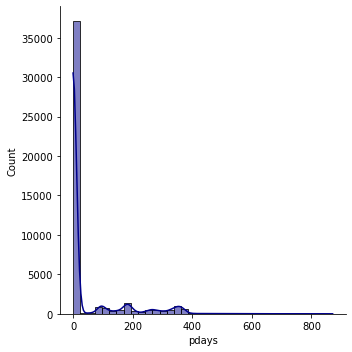

<Figure size 720x72 with 0 Axes>

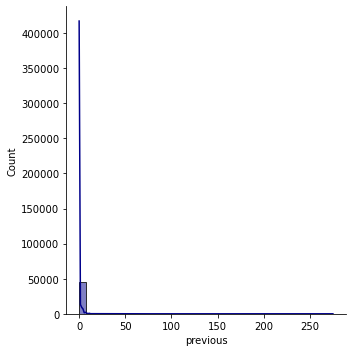

<Figure size 720x72 with 0 Axes>

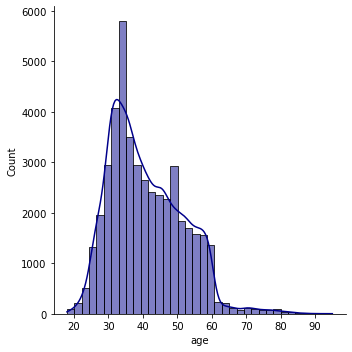

<Figure size 720x72 with 0 Axes>

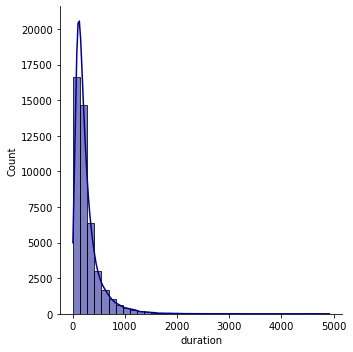

<Figure size 720x72 with 0 Axes>

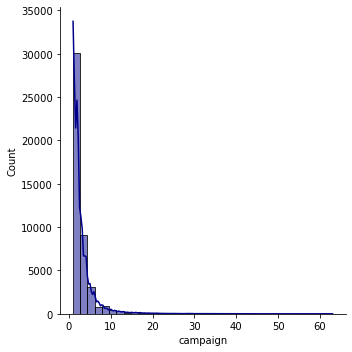

<Figure size 720x72 with 0 Axes>

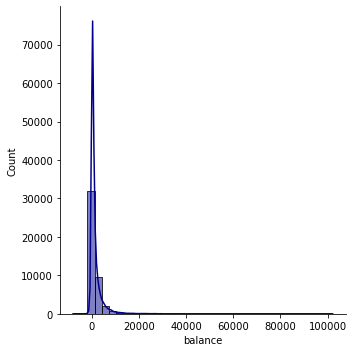

In [12]:
for column in {"age","balance", "duration","campaign","pdays", "previous"}:
    plt.figure(figsize=(10,1))
    sns.displot(data=df, x=column, kde=True, 
             bins=int(180/5), color = 'darkblue')

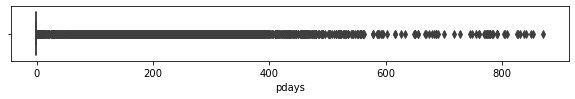

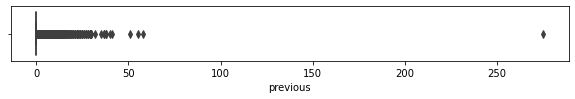

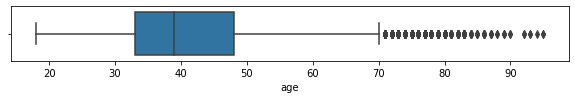

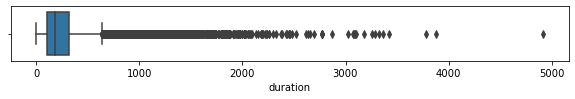

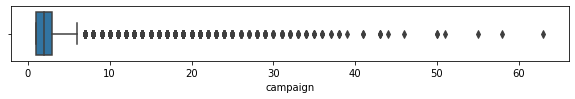

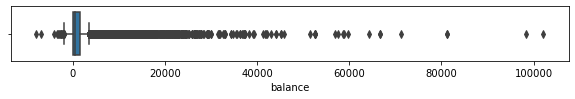

In [13]:
for column in {"age","balance", "duration","campaign","pdays", "previous"}:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=df, x=column)

## Testing of removing "null" data

Assuming that previous = 0 and pdays = -1 is the null value we will try to remove them to see the impact on data

In [14]:
df2 = df.loc[df['previous']!=0]

In [15]:
df2.shape

(8257, 17)

In [16]:
df2['y'].value_counts()

no     6352
yes    1905
Name: y, dtype: int64

In [17]:
df2.describe()

,age,balance,day,duration,campaign,pdays,previous
count,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000
mean,40.953131,1556.880102,14.289209,260.118687,2.056195,224.577692,3.177546
std,11.425180,3060.593186,7.919176,235.208105,1.561169,115.344035,4.560820
min,18.000000,-1884.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,33.000000,168.000000,7.000000,113.000000,1.000000,133.000000,1.000000
50%,38.000000,602.000000,14.000000,193.000000,2.000000,194.000000,2.000000
75%,48.000000,1743.000000,20.000000,324.000000,2.000000,327.000000,4.000000
max,93.000000,81204.000000,31.000000,2219.000000,16.000000,871.000000,275.000000


<Figure size 720x72 with 0 Axes>

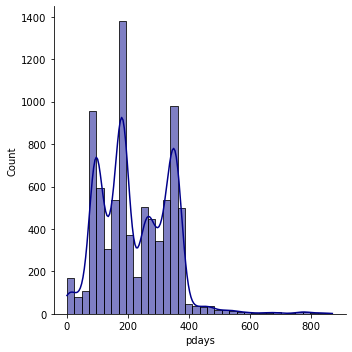

<Figure size 720x72 with 0 Axes>

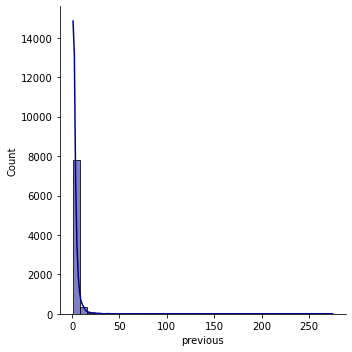

<Figure size 720x72 with 0 Axes>

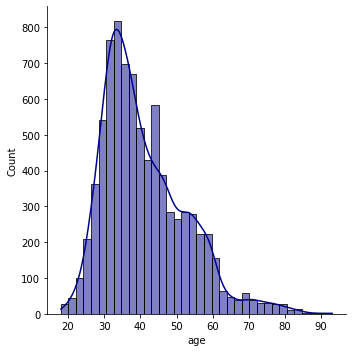

<Figure size 720x72 with 0 Axes>

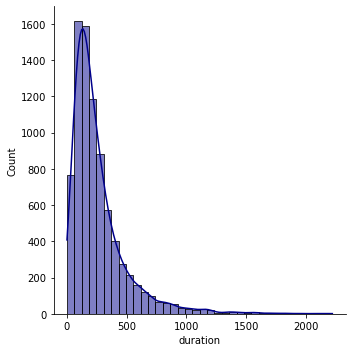

<Figure size 720x72 with 0 Axes>

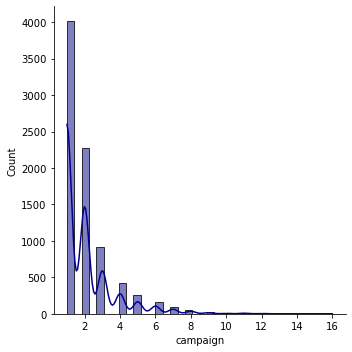

<Figure size 720x72 with 0 Axes>

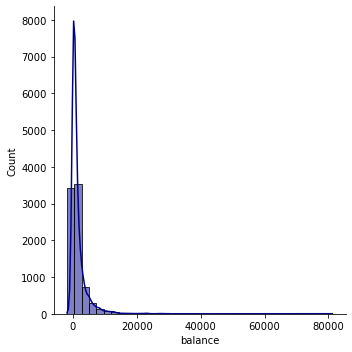

In [18]:
for column in {"age","balance", "duration","campaign","pdays", "previous"}:
    plt.figure(figsize=(10,1))
    sns.displot(data=df2, x=column, kde=True, 
             bins=int(180/5), color = 'darkblue')

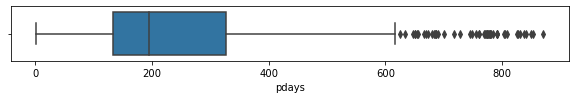

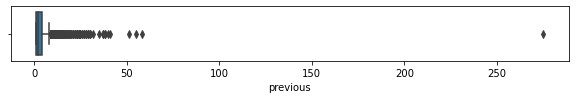

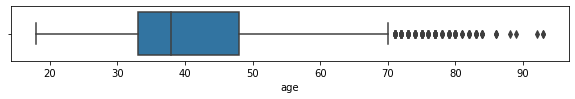

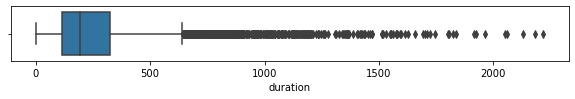

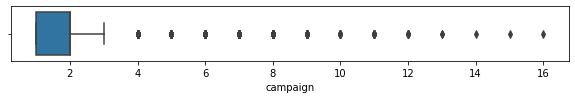

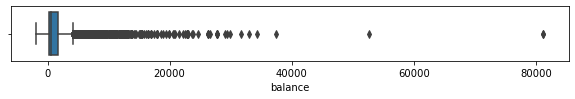

In [19]:
for column in {"age","balance", "duration","campaign","pdays", "previous"}:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=df2, x=column)

Data seems to have less outliers however since this is a classification problem we need to keep all the data. <br>
In order to fix these outliers the numeric values are going to be categorized into different categories

## Categorizing data

### Age category

In [20]:
for column in ['age']:
    #if (df[column].dtype) == 'object':  
        print(column + ': \n')
        print(np.sort(df[column].unique()))
        print(' \n')

age: 

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89
 90 92 93 94 95]
 



Trying to balance data:

In [21]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [22]:
df.loc[(df['age']<=33),'age group']="<=33"
df.loc[(df['age']>33) & (df['age']<=39),'age group']="33-39"
df.loc[(df['age']>39) & (df['age']<=48),'age group']="39-48"
df.loc[(df['age']>48),'age group']=">48"
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,>48
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,39-48
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,<=33
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,39-48
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,<=33


### Balance category

In [23]:
for column in ['balance']:
    #if (df[column].dtype) == 'object':  
        print(column + ': \n')
        print(np.sort(df[column].unique()))
        print(' \n')

balance: 

[ -8019  -6847  -4057 ...  81204  98417 102127]
 



In [24]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [25]:
df.loc[(df['balance']<=72),'balance group']="<=72"
df.loc[(df['balance']>72) & (df['balance']<=448),'balance group']="72-448"
df.loc[(df['balance']>448) & (df['balance']<=1428),'balance group']="448-1428"
df.loc[(df['balance']>1428),'balance group']=">1428"
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age group,balance group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,>48,>1428
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,39-48,<=72
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,<=33,<=72
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,39-48,>1428
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,<=33,<=72


### Duration category

In [26]:
for column in ['duration']:
    #if (df[column].dtype) == 'object':  
        print(column + ': \n')
        print(np.sort(df[column].unique()))
        print(' \n')

duration: 

[   0    1    2 ... 3785 3881 4918]
 



In [27]:
df['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [28]:
df.loc[(df['duration']<=103),'duration time']="<=103"
df.loc[(df['duration']>103) & (df['duration']<=180),'duration time']="103-180"
df.loc[(df['duration']>180) & (df['duration']<=319),'duration time']="180-319"
df.loc[(df['duration']>319),'duration time']=">319"
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age group,balance group,duration time
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,>48,>1428,180-319
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,39-48,<=72,103-180
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,<=33,<=72,<=103
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,39-48,>1428,<=103
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,<=33,<=72,180-319


### Campaign category

In [29]:
for column in ['campaign']:
    #if (df[column].dtype) == 'object':  
        print(column + ': \n')
        print(np.sort(df[column].unique()))
        print(' \n')

campaign: 

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 41 43 44 46 50 51 55 58 63]
 



In [30]:
df['campaign'].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [31]:
df.loc[(df['campaign']<=1),'campaign #']="1"
df.loc[(df['campaign']==2) ,'campaign #']="2"
df.loc[(df['campaign']>=3),'campaign #']=">3"
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,age group,balance group,duration time,campaign #
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,>48,>1428,180-319,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,39-48,<=72,103-180,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,<=33,<=72,<=103,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,39-48,>1428,<=103,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,no,<=33,<=72,180-319,1


### pdays category

In [32]:
for column in ['pdays','previous']:
    #if (df[column].dtype) == 'object':  
        print(column + ': \n')
        print(np.sort(df[column].unique()))
        print(' \n')

pdays: 

[ -1   1   2   3   4   5   6   7   8   9  10  12  13  14  15  17  18  19
  20  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 2

In [33]:
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [34]:
df['previous'].describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

Since data that have previous = 0 has pdays = -1 are people that were never contacted, data will be seperated into two categories

In [35]:
df.loc[(df['previous']==0),'contacted']='no'
df.loc[(df['previous']!=0) ,'contacted']='yes'
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,age group,balance group,duration time,campaign #,contacted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,>48,>1428,180-319,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,39-48,<=72,103-180,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,<=33,<=72,<=103,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,no,39-48,>1428,<=103,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,no,<=33,<=72,180-319,1,no


# Model selection

## Encoding Object values

In [44]:
df_eda = df[['age group','job','marital','education','default','balance group','housing','loan','contact','day','month','duration time','campaign #','poutcome','contacted','y']]
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age group      45211 non-null  object
 1   job            45211 non-null  object
 2   marital        45211 non-null  object
 3   education      45211 non-null  object
 4   default        45211 non-null  object
 5   balance group  45211 non-null  object
 6   housing        45211 non-null  object
 7   loan           45211 non-null  object
 8   contact        45211 non-null  object
 9   day            45211 non-null  int64 
 10  month          45211 non-null  object
 11  duration time  45211 non-null  object
 12  campaign #     45211 non-null  object
 13  poutcome       45211 non-null  object
 14  contacted      45211 non-null  object
 15  y              45211 non-null  object
dtypes: int64(1), object(15)
memory usage: 5.5+ MB


Separating columns with object values and numeric values

In [45]:
cat_cols = df_eda.drop(columns=['day']).columns
num_cols = ['day']

Using an ordinal encoder to encode string values

In [46]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
encoder = oe.fit_transform(df[cat_cols])
encoder = pd.DataFrame(encoder,columns = cat_cols)
oe.categories_

[array(['33-39', '39-48', '<=33', '>48'], dtype=object),
 array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single'], dtype=object),
 array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['448-1428', '72-448', '<=72', '>1428'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['cellular', 'telephone', 'unknown'], dtype=object),
 array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
        'nov', 'oct', 'sep'], dtype=object),
 array(['103-180', '180-319', '<=103', '>319'], dtype=object),
 array(['1', '2', '>3'], dtype=object),
 array(['failure', 'other', 'success', 'unknown'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [47]:
df_n = pd.concat([encoder,df_eda[num_cols]],axis=1)

# Model building

Spliting data into train and test data

In [48]:
X= df_n.drop(columns=['y'])
y= df_n['y']

In [49]:
X.head()

,age group,job,marital,education,default,balance group,housing,loan,contact,month,duration time,campaign #,poutcome,contacted,day
0,3.0,4.0,1.0,2.0,0.0,3.0,1.0,0.0,2.0,8.0,1.0,0.0,3.0,0.0,5
1,1.0,9.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0,8.0,0.0,0.0,3.0,0.0,5
2,2.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,2.0,8.0,2.0,0.0,3.0,0.0,5
3,1.0,1.0,1.0,3.0,0.0,3.0,1.0,0.0,2.0,8.0,2.0,0.0,3.0,0.0,5
4,2.0,11.0,2.0,3.0,0.0,2.0,0.0,0.0,2.0,8.0,1.0,0.0,3.0,0.0,5


In [50]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: y, dtype: float64

Balancing data with SMOTE (Synthetic Minority Over-sampling Technique) to avoid the model being biased since data has only 10% of classified 'yes'

In [72]:
oversample = SMOTE(sampling_strategy=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,  random_state =42)
X_over, y_over = oversample.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.25, random_state = 42)

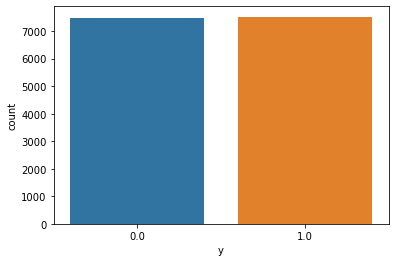

In [73]:
balanced = pd.DataFrame()
balanced['y'] = y_test

sns.countplot(x = 'y', data = balanced)
plt.show()

## Decision tree classifier

91.41865741358602
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91      7465
         1.0       0.91      0.92      0.92      7521

    accuracy                           0.91     14986
   macro avg       0.91      0.91      0.91     14986
weighted avg       0.91      0.91      0.91     14986



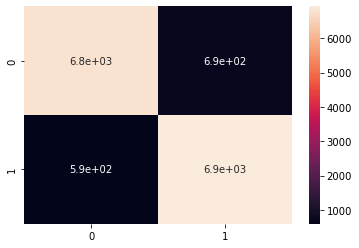

In [76]:
dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
preds = dtc.predict(X_test)
score = dtc.score(X_test, y_test)
print(score*100)
print(classification_report(y_test, preds))
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True)
plt.show()

## Logistic regression

C:\Users\aaaaa\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


74.80982250100094
              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75      7465
         1.0       0.75      0.75      0.75      7521

    accuracy                           0.75     14986
   macro avg       0.75      0.75      0.75     14986
weighted avg       0.75      0.75      0.75     14986



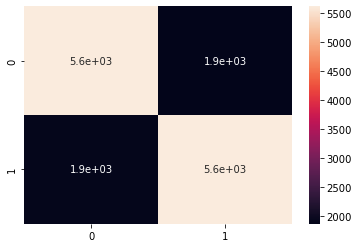

In [75]:
lgr=LogisticRegression(random_state=42 , max_iter = 200)
lgr.fit(X_train, y_train)
preds = lgr.predict(X_test)
score = lgr.score(X_test, y_test)
print(score*100)
print(classification_report(y_test, preds))
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True)
plt.show()

## Random forest classifier

94.66835713332443
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      7465
         1.0       0.96      0.93      0.95      7521

    accuracy                           0.95     14986
   macro avg       0.95      0.95      0.95     14986
weighted avg       0.95      0.95      0.95     14986



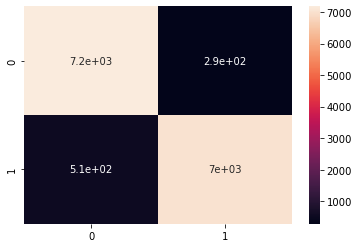

In [77]:
rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train, y_train)

preds = rfc.predict(X_test)
score = rfc.score(X_test, y_test)
print(score*100)
print(classification_report(y_test, preds))
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True)
plt.show()

## Cat boost classifier

94.49486187107968
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      7465
         1.0       0.97      0.92      0.94      7521

    accuracy                           0.94     14986
   macro avg       0.95      0.95      0.94     14986
weighted avg       0.95      0.94      0.94     14986



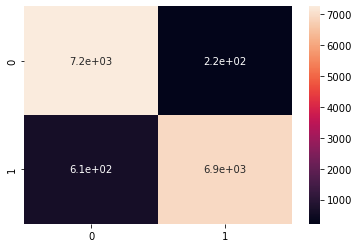

In [78]:
cbc=CatBoostClassifier(n_estimators = 200, max_depth = 5, verbose = 0 , random_state=42)
cbc.fit(X_train, y_train)
preds = cbc.predict(X_test)
score = cbc.score(X_test, y_test)
print(score*100)
print(classification_report(y_test, preds))
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True)
plt.show()

Since this is a binary classification task we can use Receiver operating characteristic (ROC)

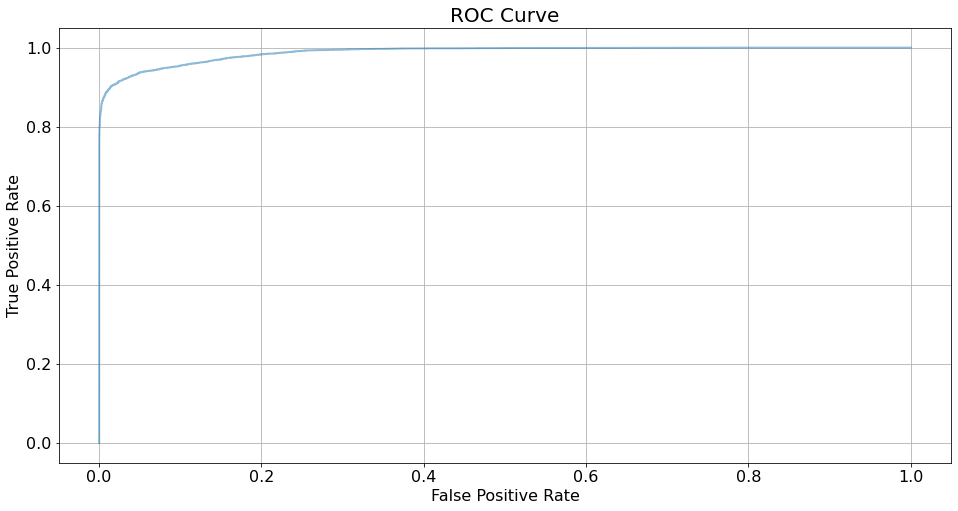

In [80]:
from catboost.utils import get_roc_curve

catboost_pool = Pool(X_test, y_test)

(fpr, tpr, thresholds) = get_roc_curve(cbc, catboost_pool, plot=True)